PARKINSON’S DISEASE PREDICTION USING LINEAR REGRESSION

Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

 1. Importing Necessary Libraries

In [6]:
import pandas as pd
import requests
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

2. Load the data

In [28]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))
c.head()


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


3. Exploratory Data Analysis (EDA)

EDA is all about understanding your data by employing summarizing and visualizing techniques. At a high level the EDA can be performed in two folds, that is, univariate analysis and multivariate analysis.


3.1.Univariate Analysis

Individual variables are analyzed in isolation to have a better understanding about them. Pandas provide the describe function to create summary statistics in tabular format for all variables. These statistics are very useful for numerical types of variables to understand any quality issues such as missing values and the presence of outliers. 

In [30]:
pd.set_option('display.max_columns', None)
c.head()
print(c.shape)
c.describe()

(5875, 22)


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [ ]:
# there is no missing value 
c.isnull().sum() 

3.2. Multivariate Analysis

In multivariate analysis you try to establish a sense of relationship of all variables with one other.

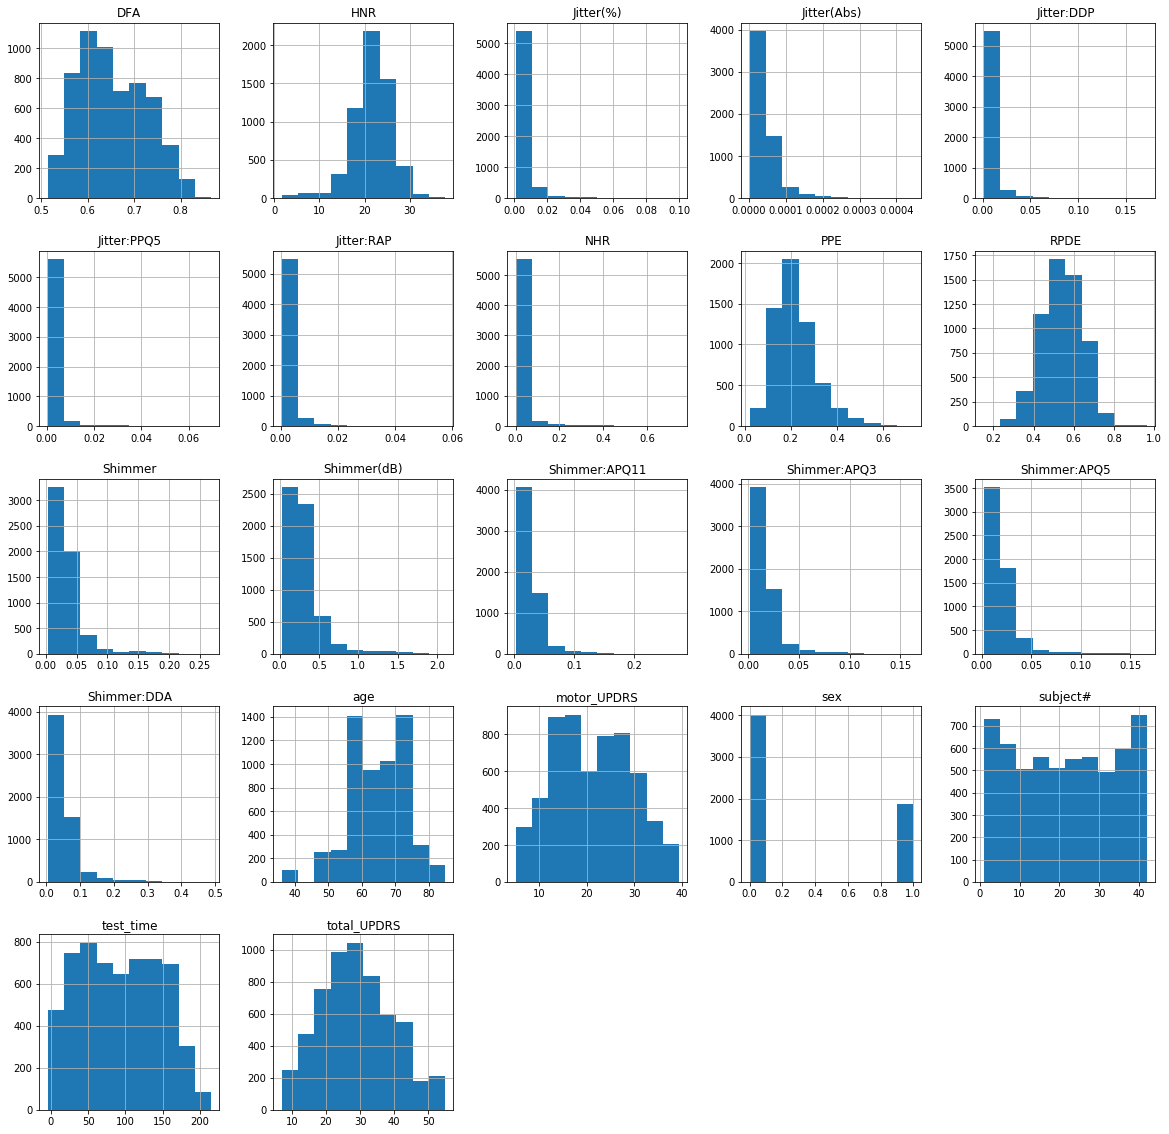

In [9]:
c.hist(figsize = (20,20))
plt.show()

Heatmap:

Heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors.Heat maps originated in 2D displays of the values in a data matrix. Larger values were represented by small dark gray or black squares (pixels) and smaller values by lighter squares. 

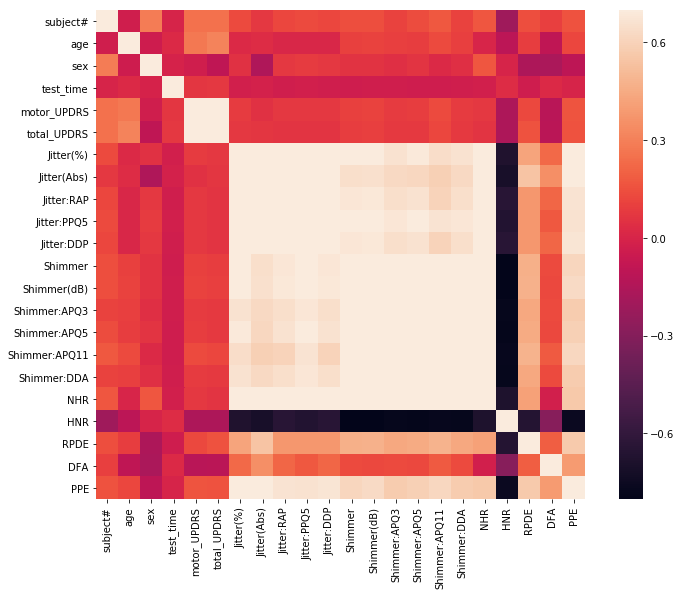

In [10]:
sn.heatmap(corrmat, vmax = .7, square = True)
plt.show()

**Correlation Matrix

The correlation function uses Pearson correlation coefficient, which results in a number
between -1 to 1. A strong negative relationship is indicated by a coefficient closer to -1
and a strong positive correlation is indicated by a coefficient toward 1

In [39]:
print (col)
corr = c.corr()
corr.style.background_gradient()
# corr.style.background_gradient().set_precision(2)

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,1,-0.0308636,0.286851,-0.000881574,0.252919,0.253643,0.135448,0.0751561,0.120339,0.136474,0.12035,0.146202,0.142864,0.11295,0.138264,0.173333,0.112949,0.168743,-0.206929,0.1473,0.0974643,0.157559
age,-0.0308636,1,-0.0416017,0.0198838,0.273665,0.31029,0.0230712,0.0356913,0.010255,0.0131994,0.0102578,0.101554,0.11113,0.0989123,0.0899829,0.135238,0.0989131,0.0070927,-0.104842,0.0902083,-0.0928702,0.12079
sex,0.286851,-0.0416017,1,-0.00980498,-0.031205,-0.0965589,0.0514216,-0.154645,0.0767182,0.0879948,0.0767032,0.0587358,0.0564805,0.0449372,0.0648193,0.0233599,0.0449376,0.16817,-0.000167112,-0.159262,-0.165113,-0.0999007
test_time,-0.000881574,0.0198838,-0.00980498,1,0.0679183,0.0752627,-0.0228371,-0.0113648,-0.0288878,-0.0232899,-0.028876,-0.0338702,-0.0309624,-0.0290197,-0.0365044,-0.0391097,-0.0290169,-0.026357,0.0365449,-0.038887,0.0192609,-0.00056337
motor_UPDRS,0.252919,0.273665,-0.031205,0.0679183,1,0.947231,0.0848158,0.0509033,0.0726835,0.0762909,0.0726979,0.102349,0.110076,0.0842606,0.0921052,0.13656,0.0842604,0.0749673,-0.157029,0.128607,-0.116242,0.162433
total_UPDRS,0.253643,0.31029,-0.0965589,0.0752627,0.947231,1,0.0742467,0.0669267,0.0640154,0.0633518,0.0640275,0.0921409,0.0987897,0.0793627,0.0834673,0.120838,0.0793632,0.0609516,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.135448,0.0230712,0.0514216,-0.0228371,0.0848158,0.0742467,1,0.865577,0.984181,0.968214,0.984184,0.709791,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.22655,0.721849
Jitter(Abs),0.0751561,0.0356913,-0.154645,-0.0113648,0.0509033,0.0669267,0.865577,1,0.844626,0.790538,0.84463,0.649046,0.655871,0.62383,0.621401,0.589998,0.623827,0.69996,-0.706418,0.5471,0.352264,0.787853
Jitter:RAP,0.120339,0.010255,0.0767182,-0.0288878,0.0726835,0.0640154,0.984181,0.844626,1,0.947196,1,0.681729,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.136474,0.0131994,0.0879948,-0.0232899,0.0762909,0.0633518,0.968214,0.790538,0.947196,1,0.947203,0.732747,0.734591,0.676711,0.734021,0.668413,0.67671,0.864864,-0.662409,0.381503,0.175359,0.663491


4. Target and Future Selection

Pair Plot
You can understand the relationship attributes by looking at the distribution of the interactions of each pair of attributes. This uses a built-in function to create a matrix of scatter plots of all attributes against all attributes

C:\Users\ofk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


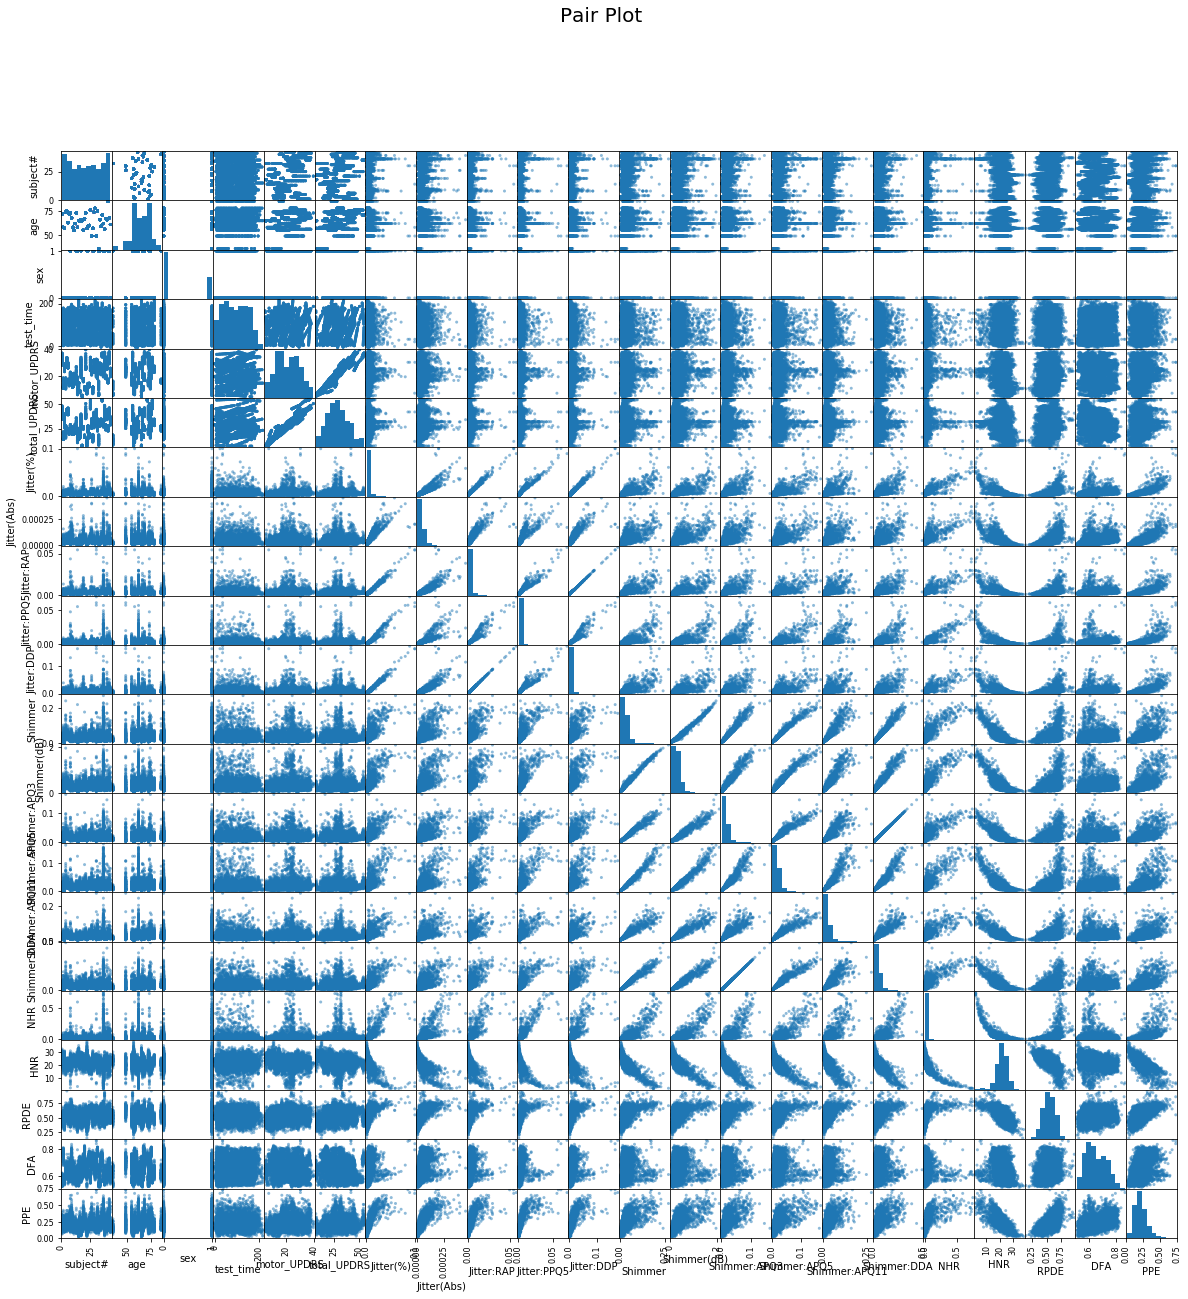

In [36]:
from pandas.tools.plotting import scatter_matrix
# import pandas.plotting.scatter_matrix
scatter_matrix(c, figsize=(20, 20))
# use suptitle to add title to all sublots
plt.suptitle("Pair Plot", fontsize=20)
#----output----
plt.show()

In [ ]:
columns = c.columns.tolist()
columns = [c for c in columns if c in ['motor_UPDRS','age','subject#','HNR','RPDE','PPE','Shimmer:APQ11','DFA']]
data= c[columns]
# columns = [c for c in columns if c not in ['total_UPDRS','sex']]
target = c[['total_UPDRS']].values.reshape(-1, 1)

print(target.shape)
print(data.shape)


In [12]:
c['total_UPDRS'].describe()

count    5875.000000
mean       29.018942
std        10.700283
min         7.000000
25%        21.371000
50%        27.576000
75%        36.399000
max        54.992000
Name: total_UPDRS, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
### END SOLUTION


In [14]:
 def plotActPredOverIdeal(y_act,y_pred, alg,c1):
        rmse= format(mean_squared_error(y_act,y_pred),",.2f")      
        p1 =plt.scatter(y_act,y_pred,c=c1)
        maxValue = max(max(y_act), max(y_pred))
        p2, = plt.plot([0, maxValue], [0, maxValue], color='#808080', linestyle='--', linewidth=2)
        #plt.legend([p1, p2],["RMSE: %s days"%rmse, "Ideal prediction"],loc=0)
        plt.legend([p1,p2],["MSE: %s"%rmse, "Ideal prediction"],loc=0)
        plt.grid()
        plt.xlabel('Actual total_UPDRS')
        plt.ylabel('Predicted total_UPDRS')
        plt.title("Forecasting total_UPDRS using %s"%alg)
        plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR = LinearRegression(normalize=True)
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [42]:
print('Coefficients: \n', LR.coef_)

Coefficients: 
 [[ 1.62609841e-02  6.82445802e-02  1.21969427e+00 -2.74024503e+01
  -7.20912443e-02  4.73072498e+00  2.46293054e-02 -2.19897398e+00]]


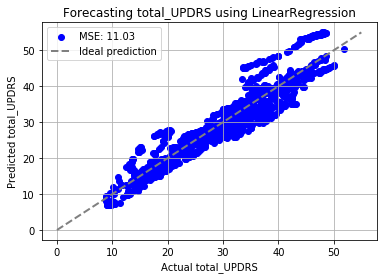

In [17]:
prediction = LR.predict(X_test)
mean_squared_error(prediction,y_test)
plotActPredOverIdeal(prediction,y_test,'LinearRegression','blue')

In [16]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)
RFR.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

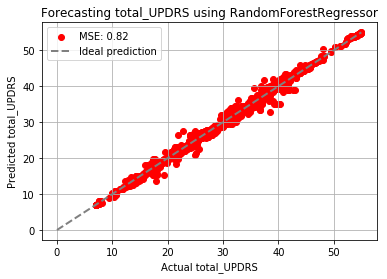

In [18]:
prediction = RFR.predict(X_test)
mean_squared_error(prediction,y_test)
plotActPredOverIdeal(prediction,y_test,'RandomForestRegressor','red')

In [20]:
import math 
total_UPDRS_max=54.992000
total_UPDRS_min=7
l=total_UPDRS_max-total_UPDRS_min
NRMSE_LR= math.sqrt(11.03)/l
NRMSE_LR

0.06920204161283387

In [21]:
NRMSE_RF= math.sqrt(0.82)/l
NRMSE_RF

0.01886853045952954

In [23]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train.ravel())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": 0.9863


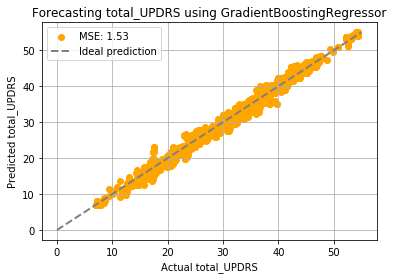

In [26]:
prediction = model.predict(X_test)
mean_squared_error(prediction,y_test)
plotActPredOverIdeal(prediction,y_test,'GradientBoostingRegressor','orange')

In [27]:
Gradient= math.sqrt(0.82)/l
Gradient

0.01886853045952954